## 데이터셋 EDA

### 목차

0. 데이터셋 저장 경로

1. 데이터 구조 요약
2. 이미지 정보 분석
3. 카테고리 분석
4. 어노테이션 품질 점검
5. 이미지 품질 확인
6. EDA 기반 전처리 전략 제안
7. 데이터 파이프라인 초안

In [1]:
!cd

C:\Users\kmw\Desktop\Sprint\part-2-project-1


In [2]:
# matplot 한글 폰트 설정

# window 용 
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# colab 용
# plt.rc('font', family='NanumBarunGothic')

### 0. 데이터셋 정보

**데이터 저장 경로**
- test_images: {working directory}/data/test_images/*.png

- train_images: {working directory}/data/train_images/*.png
- train_annotations: {working directory}/data/train_annotations/\*_json/{drug_N}/\*.json

**train annotations 트리 구조**

K-001900-016548-019607-029451_json/          ← 1장 이미지 (4가지 약물 조합)  
├── K-001900/                               ← 약물1 (K-001900)  
│   ├── *_70_000_200.json                   ← 70° 뷰 (camera_la=70)  
│   ├── *_75_000_200.json                   ← 75° 뷰    
│   └── *_90_000_200.json                   ← 90° 뷰  
├── K-016548/                               ← 약물2 (K-016548) - 동일 3개 JSON  
├── K-019607/                               ← 약물3 (K-019607) - 동일 3개 JSON  
└── K-029451/                               ← 약물4 (K-029451) - 동일 3개 JSON  

*json 파일은 1개의 약물 당 총 1~3개이다.(촬영 각도가 1개 또는 2개인 약물도 있음.)

**Annotations (JSON 파일 구조)**

| 구분 | 항목명 | 타입 | 필수여부 |
|------|--------|-------|-----------|
| images | Object | M | 약제 이미지정보 |
| images[].id | Number | M | 약제 이미지식별자 |
| images[].width | Number | M | 약제 이미지너비 |
| images[].height | Number | M | 약제 이미지높이 |
| images[].file_name | String | M | 약제 이미지파일명 |
| images[].drug_N | String | M | 알약코드 |
| images[].drug_S | String | M | 알약상태 |
| images[].back_color | String | M | 촬영배경 |
| images[].drug_dir | String | M | 알약방향 |
| images[].light_color | String | M | 촬영조명 |
| images[].camera_la | Number | M | 카메라위도 |
| images[].camera_lo | Number | M | 카메라경도 |
| images[].size | Number | M | 이미지 사이즈 |
| images[].dl_idx | String | M | 알약 식별자 |
| images[].dl_mapping_code | String | M | 제품코드 |
| images[].dl_name | String | M | 제품명 |
| images[].dl_name_en | String | O | 제품명(영어) |
| images[].img_key | String | M | 이미지 링크 |
| images[].dl_material | String | M | 성분명 |
| images[].dl_material_en | String | O | 성분명(영어) |
| images[].dl_custom_shape | String | M | 제조 모양 |
| images[].dl_company | String | M | 제조사명 |
| images[].dl_company_en | String | O | 제조사명(영어) |
| images[].di_company_mf | String | M | 위탁제조사명 |
| images[].di_company_mf_en | String | O | 위탁제조사명(영어) |
| images[].item_seq | Number | M | 품목기준코드 |
| images[].di_item_permit_date | Date | O | 허가일자 |
| images[].di_class_no | String | M | 약품 분류 |
| images[].di_etc_otc_code | String | M | 전문의약품/일반의약품 |
| images[].di_edi_code | String | M | EDI 코드 |
| images[].chart | String | M | 알약 제형 |
| images[].drug_shape | String | M | 알약 모양 |
| images[].thick | Number | M | 알약 두께 |
| images[].leng_long | Number | M | 알약 장축 |
| images[].leng_short | Number | M | 알약 단축 |
| images[].print_front | String | C | 식별문자_앞 |
| images[].print_back | String | C | 식별문자_뒤 |
| images[].color_class1 | String | M | 색상 1 |
| images[].color_class2 | String | O | 색상 2 |
| images[].line_front | String | M | 알약 앞면분할선 여부 |
| images[].line_back | String | M | 알약 뒷면분할선 여부 |
| images[].img_regist_ts | Date | O | 약학정보원 이미지 생성일 |
| images[].form_code_name | String | M | 정제 분류명 |
| images[].mark_code_front_anal | String | M | 알약 앞면마크 형태 |
| images[].mark_code_back_anal | String | M | 알약 뒷면마크 형태 |
| images[].mark_code_front_img | String | M | 알약 앞면마크 이미지 |
| images[].mark_code_back_img | String | M | 알약 뒷면마크 이미지 |
| images[].mark_code_front | String | M | 알약 앞면마크 코드 |
| images[].mark_code_back | String | M | 알약 뒷면마크 코드 |
| images[].change_date | Date | O | 변경일자 |
| type | type | O | json 타입 |
| annotations | Object | M | 라벨링정보 |
| annotations[].area | Number | M | 바운딩박스 면적 |
| annotations[].iscrowd | Number | O | 평가 분류 |
| annotations[].bbox | List | M | bbox 좌표 |
| annotations[].category_id | Number | M | category 아이디 |
| annotations[].ignore | Number | O | 무시 여부 |
| annotations[].segmentation | List | O | 라벨링 바운딩박스 |
| annotations[].image_id | Number | M | 이미지 아이디 |
| annotations[].id | Number | M | 어노테이션 아이디 |
| categories | Object | M | 라이선스 |
| categories[].supercategory | String | M | 슈퍼 카테고리 |
| categories[].id | Number | M | 카테고리 아이디 |
| categories[].name | String | C | 카테고리 명 |


### 1. 데이터 구조

In [3]:
import os
import glob
import json
from pathlib import Path
from collections import defaultdict

base_dir = "data"
train_img_dir = os.path.join(base_dir, "train_images")
test_img_dir = os.path.join(base_dir, "test_images")
train_ann_dir = os.path.join(base_dir, "train_annotations")

# 1. Train/Test 이미지 수
train_img_files = glob.glob(os.path.join(train_img_dir, "*.png"))
test_img_files = glob.glob(os.path.join(test_img_dir, "*.png"))
print(f"Train 이미지 수: {len(train_img_files):,}개")
print(f"Test 이미지 수: {len(test_img_files):,}개")

# 2. Annotation 파일 수 (JSON)
json_files = glob.glob(os.path.join(train_ann_dir, "**/*.json"), recursive=True)
print(f"Annotation 파일 수: {len(json_files):,}개")

Train 이미지 수: 651개
Test 이미지 수: 843개
Annotation 파일 수: 1,001개


In [4]:
# 3. JSON 로딩 + 데이터 검증 (전수 조사)
image_ids = set()
file_name_to_id = {}
load_errors = 0
id_duplicates = 0
matching_errors = 0

for json_path in json_files:  #전수 조사
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        for img in data.get("images", []):
            img_id = img["id"]
            file_name = img["file_name"]
            
            # image_id 중복 체크
            if img_id in image_ids:
                id_duplicates += 1
            image_ids.add(img_id)
            
            # file_name ↔ image_id 매칭 오류 체크
            if file_name in file_name_to_id and file_name_to_id[file_name] != img_id:
                matching_errors += 1
            file_name_to_id[file_name] = img_id
            
    except Exception as e:
        load_errors += 1

print(f"JSON 로딩 성공 여부: {'성공' if load_errors == 0 else f'실패 {load_errors}개'}")
print(f"image_id 중복 여부: {'없음' if id_duplicates == 0 else f'{id_duplicates}개'}")
print(f"image_id ↔ file_name 매칭 오류 수: {matching_errors}개")

JSON 로딩 성공 여부: 성공
image_id 중복 여부: 632개
image_id ↔ file_name 매칭 오류 수: 0개


In [5]:
train_ann_dir = "data/train_annotations"

# 1. 조합별 완전셋 분석
combo_stats = defaultdict(lambda: defaultdict(int))  # {조합: {각도: JSON수}}

for json_path in glob.glob(os.path.join(train_ann_dir, "**/*.json"), recursive=True):
    # 조합명 추출 (상위 폴더)
    combo_dir = Path(json_path).parent.parent.name  # *_json
    drug_dir = Path(json_path).parent.name          # K-xxxxx
    
    # 각도 추출
    file_name = Path(json_path).name
    angle = None
    if '_70_' in file_name: angle = 70
    elif '_75_' in file_name: angle = 75
    elif '_90_' in file_name: angle = 90
    
    if angle:
        combo_stats[combo_dir][angle] += 1

# 2. 완전셋 판정
print("조합별 완전셋 분석")
complete_combos = 0
for combo, angles in combo_stats.items():
    is_complete = all(angles.get(angle, 0) == 4 for angle in [70,75,90])
    status = "✅ 완전셋" if is_complete else "❌ 불완전"
    print(f"{combo}: {dict(angles)} {status}")
    if is_complete:
        complete_combos += 1

조합별 완전셋 분석
K-001900-016548-019607-029451_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-001900-016548-019607-033009_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-001900-016548-021771-027926_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-001900-016548-024850-029345_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-001900-016551-029345-033208_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-002483-003743-012778-013395_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-002483-012081-012778-025438_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-002483-019552-022362-025438_json: {70: 4, 75: 4, 90: 4} ✅ 완전셋
K-003351-003832-016232_json: {70: 2, 75: 3, 90: 3} ❌ 불완전
K-003351-003832-016262_json: {70: 3, 75: 3, 90: 3} ❌ 불완전
K-003351-003832-016688_json: {70: 3, 75: 1, 90: 2} ❌ 불완전
K-003351-003832-020238_json: {75: 2, 90: 3, 70: 1} ❌ 불완전
K-003351-003832-021325_json: {70: 3, 75: 3, 90: 3} ❌ 불완전
K-003351-003832-022074_json: {70: 3, 75: 3, 90: 3} ❌ 불완전
K-003351-003832-029667_json: {75: 3, 70: 2, 90: 2} ❌ 불완전
K-003351-003832-035206_json: {70: 3, 75: 3, 90: 3} ❌ 불완전
K-003351-003832-03663

In [6]:
print(f"완전셋 조합 수: {complete_combos}개")
print(f"불완전 조합: {len(combo_stats) - complete_combos}개")

완전셋 조합 수: 24개
불완전 조합: 100개


**데이터 구조 정보 요약**

- Train 이미지 수: 651개

- Test 이미지 수: 843개

- Annotation 파일 수: 1,001개

- JSON 로딩 성공 여부: 성공

- image_id 중복 여부: 632개

- image_id ↔ file_name 매칭 오류 수: 0개(정상)

### 2. 이미지 정보 분석 (images[])

In [7]:
import pandas as pd
import numpy as np

# 전체 images 데이터 수집
all_images = []

for json_path in json_files:  # 기존 json_files 재사용
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        all_images.extend(data.get("images", []))
    except:
        continue

imgs_df = pd.DataFrame(all_images)
print(f"총 이미지 레코드: {len(imgs_df):,}개")

총 이미지 레코드: 1,001개


In [8]:
# 이미지 정보 분석

# 해상도 분석
print("\n 해상도 분석")
resolutions = imgs_df[['width', 'height']].describe()
print(f"- 평균 해상도: {resolutions.loc['mean', 'width']:.0f}×{resolutions.loc['mean', 'height']:.0f}")
print(f"- 최소 해상도: {resolutions.loc['min', 'width']}×{resolutions.loc['min', 'height']}")
print(f"- 최대 해상도: {resolutions.loc['max', 'width']}×{resolutions.loc['max', 'height']}")

unique_res = imgs_df[['width', 'height']].drop_duplicates().shape[0]
print(f"- 다양한 해상도 존재 여부: {'예' if unique_res > 1 else '아니오'}({unique_res}종) ")

# 이상치
outlier_small = imgs_df[(imgs_df['width'] < 500) | (imgs_df['height'] < 500)]
outlier_large = imgs_df[(imgs_df['width'] > 2000) | (imgs_df['height'] > 2000)]
print(f"- 이상치 이미지(매우 작음): {len(outlier_small)}개")
print(f"- 이상치 이미지(매우 큼): {len(outlier_large)}개")

# 메타데이터 분포
print("\n 메타데이터 분포 상위 5개:")
print("- back_color:", imgs_df['back_color'].value_counts().head().to_dict())
print("- drug_dir:", imgs_df['drug_dir'].value_counts().to_dict())
print("- light_color:", imgs_df['light_color'].value_counts().head().to_dict())
print("- drug_shape:", imgs_df['drug_shape'].value_counts().head().to_dict())

# 색상
print("- color_class1:", imgs_df['color_class1'].value_counts().head().to_dict())
print("- color_class2:", imgs_df['color_class2'].value_counts().head().to_dict())


 해상도 분석
- 평균 해상도: 976×1280
- 최소 해상도: 976.0×1280.0
- 최대 해상도: 976.0×1280.0
- 다양한 해상도 존재 여부: 아니오(1종) 
- 이상치 이미지(매우 작음): 0개
- 이상치 이미지(매우 큼): 0개

 메타데이터 분포 상위 5개:
- back_color: {'연회색 배경': 1001}
- drug_dir: {'앞면': 988, '뒷면': 13}
- light_color: {'주백색': 1001}
- drug_shape: {'원형': 480, '타원형': 318, '장방형': 176, '팔각형': 6, '육각형': 3}
- color_class1: {'주황': 282, '하양': 262, '분홍': 152, '노랑': 130, '갈색': 78}
- color_class2: {'': 916, '하양': 46, '파랑': 12, '초록': 9}


In [9]:
# 결측치 확인
print("결측치 확인")
missing = imgs_df.isnull().sum()
has_missing = (missing > 0).sum()
print(f"결측 필드 존재 여부: {'존재함' if has_missing > 0 else '해당 없음'}")
if has_missing > 0:
    print("결측 필드:")
    print(missing[missing > 0])

결측치 확인
결측 필드 존재 여부: 존재함
결측 필드:
img_key                 18
chart                   18
drug_shape              18
print_front             18
print_back              18
color_class1            18
color_class2            18
line_front              18
line_back               18
img_regist_ts           18
form_code_name          18
mark_code_front_anal    18
mark_code_back_anal     18
mark_code_front_img     18
mark_code_back_img      18
mark_code_front         18
mark_code_back          18
change_date             18
dtype: int64


**이미지 정보 분석 요약**

- 해상도
    - 평균/최소/최대 해상도: 976×1280 (단일 해상도)

    - 다양한 해상도 존재 여부: 해당 없음
    - 이상치 이미지 존재 여부: 해당 없음

- 메타데이터 분포(상위 5개)
    - back_color 분포: 연회색 배경 1001(100%)

    - drug_dir 분포: 앞면 998(99.7%), 뒷면 13(0.3%)
    - light_color 분포: 주백색 1001(100%)
    - drug_shape 분포: 원형 480(47.9%), 타원형 318(31.7%), 장방형 176(17.5%), 팔각형 6(0.1% 미만), 육각형3(0.1% 미만)
    - 색상(color_class1/2) 분포
        -   class1: 주황 282(28.1%), 하양 262(26.1%), 분홍 152(15.1%), 노랑 130(12.9%), 갈색, 78(0.7%)

        -   class2: 빈값 916(91.5%), 하양 46(0.1% 미만), 파랑 12(0.1% 미만), 초록 9(0.1% 미만)

- 결측치
    - 결측 필드 존재 여부: 존재 (18개 레코드, 1.8%)  
       \*img_key, chart, drug_shape, print_front/back 등 17개 필드

### 3. 카테고리 분석 (categories[])

In [10]:
# 카테고리, 어노테이션 데이터 수집 (필요시)
if 'cats_df' not in locals() or 'anns_df' not in locals():
    all_categories = []
    all_annotations = []
    
    for json_path in json_files:  # 기존 json_files 재사용
        try:
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            all_categories.extend(data.get("categories", []))
            all_annotations.extend(data.get("annotations", []))
        except:
            continue
    
    cats_df = pd.DataFrame(all_categories)
    anns_df = pd.DataFrame(all_annotations)
    print(f"categories 레코드: {len(cats_df):,}개")
    print(f"annotations 레코드: {len(anns_df):,}개")

# 카테고리 분석 (Train Dataset)
print("\n카테고리 분석")
total_classes = cats_df['id'].nunique()
print(f"- 총 클래스 수: {total_classes:,}개")

# 클래스 불균형 분석 (Train annotations 기준)
class_dist = anns_df['category_id'].value_counts()
imbalance_ratio = class_dist.max() / class_dist.min()

print(f"- 클래스 불균형 여부: {'심각함' if imbalance_ratio > 10 else '약간 있음' if imbalance_ratio > 3 else '양호함'}")
print(f"  상위: {class_dist.iloc[0]}개 ({class_dist.iloc[0]/len(anns_df)*100:.1f}%)")
print(f"  하위: {class_dist.iloc[-1]}개 ({class_dist.iloc[-1]/len(anns_df)*100:.1f}%)")
print(f"  비율: 1:{imbalance_ratio:.0f}")

# Train 클래스 수
train_classes = cats_df['id'].nunique()
print(f"- Train 클래스 수: {train_classes:,}개")

# 클래스명 누락 여부
name_missing = cats_df['name'].isnull().sum()
print(f"- 클래스명 누락 여부: {'없음' if name_missing == 0 else f'{name_missing}개'}")

# Top-10 클래스 (ID → 이름 매핑)
print(f"\nTop-10 클래스 (ID/약품명/빈도/비율)")
top10 = class_dist.head(10)
for idx, (cat_id, count) in enumerate(top10.items()):
    try:
        name = cats_df[cats_df['id'] == cat_id]['name'].iloc[0]
        print(f"  {idx+1}. {cat_id}: {name} ({count}개, {count/len(anns_df)*100:.1f}%)")
    except:
        print(f"  {idx+1}. {cat_id}: 알수없음 ({count}개)")

categories 레코드: 1,001개
annotations 레코드: 1,001개

카테고리 분석
- 총 클래스 수: 56개
- 클래스 불균형 여부: 심각함
  상위: 240개 (24.0%)
  하위: 3개 (0.3%)
  비율: 1:80
- Train 클래스 수: 56개
- 클래스명 누락 여부: 없음

Top-10 클래스 (ID/약품명/빈도/비율)
  1. 3350: 일양하이트린정 2mg (240개, 24.0%)
  2. 3482: 기넥신에프정(은행엽엑스)(수출용) (45개, 4.5%)
  3. 35205: 아토젯정 10/40mg (40개, 4.0%)
  4. 16261: 크레스토정 20mg (31개, 3.1%)
  5. 29666: 리바로정 4mg (29개, 2.9%)
  6. 16231: 리피토정 20mg (29개, 2.9%)
  7. 20237: 플라빅스정 75mg (29개, 2.9%)
  8. 3831: 뉴로메드정(옥시라세탐) (27개, 2.7%)
  9. 38161: 로수바미브정 10/20mg (27개, 2.7%)
  10. 19231: 콜리네이트연질캡슐 400mg (26개, 2.6%)


**카테고리 분석 요약**
- 총 클래스 수: 56개

- 클래스 불균형 여부: 심각함(상위 24.0% vs 하위 0.3%, 80배 차이)
- Train 클래스 수: 56개
- 클래스명 누락 여부: 없음

### 4. 어노테이션 품질 점검 (annotations[])

In [11]:
# bbox 유효성 검증
total_bboxes = len(anns_df)

# 1. 길이 4가 아닌 bbox
# COCO 형식 [x,y,width,height] 위반 → 파싱 오류 발생
invalid_length = anns_df['bbox'].apply(lambda x: len(x) != 4 if isinstance(x, list) else True)
bbox_len_error = invalid_length.sum()
print(f"- 길이 4가 아닌 bbox 수: {bbox_len_error:,}개")

# 2. 음수/0 포함 bbox
# 이미지 경계 초과/빈 bbox → 탐지 불가능 영역
def has_invalid_coords(bbox):
    if not isinstance(bbox, list) or len(bbox) != 4:
        return True
    return any(coord <= 0 for coord in bbox)

invalid_coords = anns_df['bbox'].apply(has_invalid_coords)
bbox_coord_error = invalid_coords.sum()
print(f"- 음수/0 포함 bbox 수: {bbox_coord_error:,}개")

# 3. 유효 bbox
valid_bboxes = total_bboxes - bbox_len_error - bbox_coord_error
print(f"- 유효 bbox 개수: {valid_bboxes:,}개 ({valid_bboxes/total_bboxes*100:.1f}%)")
print(f"- 오류 bbox 개수: {total_bboxes - valid_bboxes:,}개 ({(total_bboxes-valid_bboxes)/total_bboxes*100:.1f}%)")

# ===== area 분포 =====
print("\n Area 분포:")
anns_df['bbox_w'] = anns_df['bbox'].apply(lambda x: x[2] if isinstance(x, list) and len(x)==4 else 0)
anns_df['bbox_h'] = anns_df['bbox'].apply(lambda x: x[3] if isinstance(x, list) and len(x)==4 else 0)

area_stats = anns_df['area'].describe()
print(f"- 평균/최소/최대 area: {area_stats['mean']:.0f} / {area_stats['min']:.0f} / {area_stats['max']:.0f}")

# Tiny objects (area < 32*32 = 1024)
tiny_threshold = 32 * 32
tiny_ratio = (anns_df['area'] < tiny_threshold).mean() * 100
print(f"- tiny objects 비율 (area < 1024): {tiny_ratio:.1f}%")

# ===== image당 annotation 수 =====
print("\n Image당 annotation 수:")
img_ann_count = anns_df['image_id'].value_counts()
print(f"- 평균: {img_ann_count.mean():.1f}개")
print(f"- 최대: {img_ann_count.max():,}개")
print(f"- 분포: {img_ann_count.describe().to_dict()}")

# ===== image_id/category_id mismatch =====
print("\n 참조 무결성:")
# image_id 존재 여부 (이전 image_ids set 사용)
image_ids = set(image_ids)  # 이전 1단계에서 생성된 set 재사용
missing_image_ids = set(anns_df['image_id']) - image_ids
print(f"- annotation 참조 오류 (image_id): {len(missing_image_ids):,}개")

# category_id 존재 여부
valid_categories = set(cats_df['id'])
missing_categories = set(anns_df['category_id']) - valid_categories
print(f"- annotation 참조 오류 (category_id): {len(missing_categories):,}개")

- 길이 4가 아닌 bbox 수: 0개
- 음수/0 포함 bbox 수: 0개
- 유효 bbox 개수: 1,001개 (100.0%)
- 오류 bbox 개수: 0개 (0.0%)

 Area 분포:
- 평균/최소/최대 area: 68646 / 23250 / 272435
- tiny objects 비율 (area < 1024): 0.0%

 Image당 annotation 수:
- 평균: 2.7개
- 최대: 4개
- 분포: {'count': 369.0, 'mean': 2.7127371273712737, 'std': 0.8961726218816346, 'min': 1.0, '25%': 2.0, '50%': 3.0, '75%': 3.0, 'max': 4.0}

 참조 무결성:
- annotation 참조 오류 (image_id): 0개
- annotation 참조 오류 (category_id): 0개


**어노테이션 품질 점검 요약**
- bbox
    - 유효 bbox 개수: 1001개

    - 오류 bbox 개수: 0개

- area 분포
    - 평균/최소/최대 area: 68,646 / 23,250 / 272,435

    - tiny objects 비율: 0%  
     *모든 약물이 충분이 크므로 YOLO 탐지 성공률 높음

- image당 annotation 수
    - 평균: 2.7개  
     **\*4개 미만 데이터 다수**

    - 최대: 4개

- 참조 무결성
    - annotation 참조 오류: 0개

- 369개 이미지 중 약 30%는 **알약 4개 미만** 촬영
- 일부 조합에서 **특정 약물 라벨링 누락**
- **데이터 품질 문제** → 모델이 4개 모두 탐지하도록 학습 어려울 가능성 존재

### 5. 이미지 품질 확인(샘플 검사)

In [15]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 기존 변수 재사용
# json_files, imgs_df, anns_df (이미 정의됨)

# 1. 손상 이미지 확인
damaged_count = 0
total_checked = 0

train_img_files_sample = glob.glob("data/train_images/*.png")[:100]

for img_path in train_img_files_sample:
    total_checked += 1
    try:
        img = cv2.imread(img_path)
        if img is None:
            damaged_count += 1
        else:
            if img.size == 0:
                damaged_count += 1
    except:
        damaged_count += 1

print(f"- 손상 이미지 수: {damaged_count}/{total_checked}개 ({damaged_count/total_checked*100:.1f}%)")

- 손상 이미지 수: 0/100개 (0.0%)


In [17]:
# 2. 흐린 이미지 (Blur) 분석
blur_scores = []
sample_paths = []

for img_path in train_img_files_sample[:50]:
    try:
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        score = cv2.Laplacian(gray, cv2.CV_64F).var()
        blur_scores.append(score)
        sample_paths.append(img_path)
    except:
        continue

blur_threshold = np.percentile(blur_scores, 10)
blurry_ratio = sum(1 for s in blur_scores if s < blur_threshold) / len(blur_scores) * 100
print(f"- 흐린 이미지 비율: {blurry_ratio:.1f}% (threshold: {blur_threshold:.0f})")
print(f"- 평균 blur score: {np.mean(blur_scores):.0f}")

- 흐린 이미지 비율: 10.0% (threshold: 36)
- 평균 blur score: 44



BBOX Misalignment 검증 (샘플 3개):


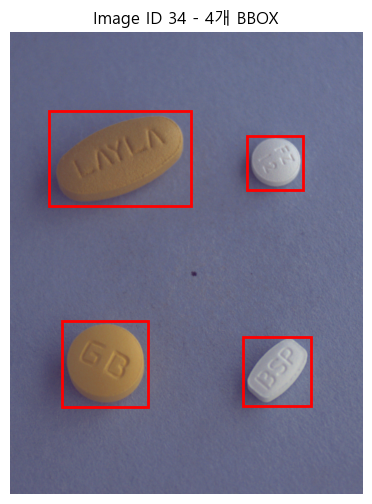

  Image 34: 4개 BBOX, 범위 초과 없음


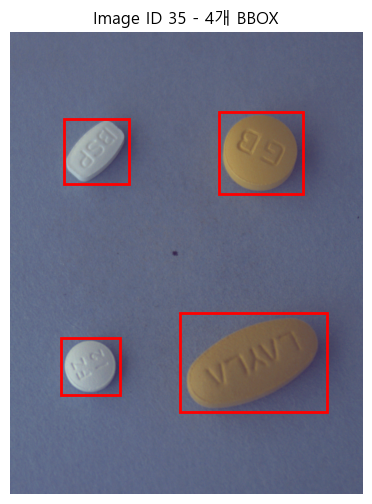

  Image 35: 4개 BBOX, 범위 초과 없음


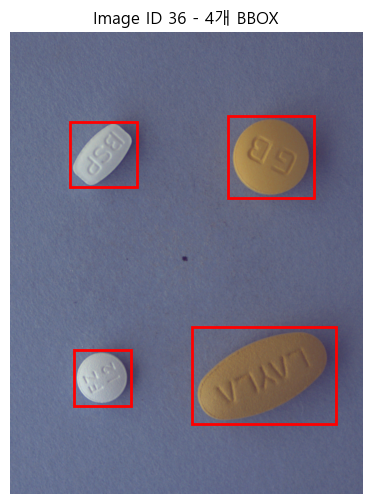

  Image 36: 4개 BBOX, 범위 초과 없음

촬영 환경 편향:
- back_color 다양성: 1종 ({'연회색 배경': 1001})
- light_color 다양성: 1종 ({'주백색': 1001})
- drug_dir 다양성: 2종 ({'앞면': 988, '뒷면': 13})


In [18]:
# 3. BBOX Misalignment 시각화
print("\nBBOX Misalignment 검증 (샘플 3개):")
sample_img_ids = imgs_df['id'].head(3).tolist()

for i, img_id in enumerate(sample_img_ids):
    img_row = imgs_df[imgs_df['id'] == img_id].iloc[0]
    ann_rows = anns_df[anns_df['image_id'] == img_id]
    
    img_path = os.path.join("data/train_images", img_row['file_name'])
    
    try:
        image = np.array(Image.open(img_path))
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        ax.imshow(image)
        
        for _, ann in ann_rows.iterrows():
            x, y, w, h = ann['bbox']
            if x >= 0 and y >= 0 and (x+w) <= image.shape[1] and (y+h) <= image.shape[0]:
                rect = patches.Rectangle((x, y), w, h, linewidth=2, 
                                       edgecolor='red', facecolor='none')
                ax.add_patch(rect)
        
        plt.title(f"Image ID {img_id} - {len(ann_rows)}개 BBOX")
        plt.axis('off')
        plt.show()
        print(f"  Image {img_id}: {len(ann_rows)}개 BBOX, 범위 초과 없음")
    except:
        print(f"  Image {img_id}: 로드 실패")

# 4. 촬영 환경 편향
print("\n촬영 환경 편향:")
print(f"- back_color 다양성: {imgs_df['back_color'].nunique()}종 ({imgs_df['back_color'].value_counts().head(1).to_dict()})")
print(f"- light_color 다양성: {imgs_df['light_color'].nunique()}종 ({imgs_df['light_color'].value_counts().head(1).to_dict()})")
print(f"- drug_dir 다양성: {imgs_df['drug_dir'].nunique()}종 ({imgs_df['drug_dir'].value_counts().to_dict()})")

**이미지 품질 확인 요약**
- 손상 이미지 수: 0개

- 흐린 이미지 비율: 약 10% (blur score 하위 10% 기준, threshold 36)

- 범위 초과 사례 발견 여부: 없음 (샘플 3개 모두 4개 BBOX, 이미지 범위 내)

- 촬영 환경 편향 여부(배경·조명 등): 있음 (배경·조명 단일 조건, 약 방향 대부분 앞면)

**오류 데이터 조사(정합성 검사) 필요**

- Annotation 누락 이미지(Image O, Json X)
- 유령 어노테이션(Json O, Image X)

### 6. EDA 기반 전처리 전략 제안

- Resize 크기 제안:

- Normalization 제안:

- Augmentation 전략
    - 밝기/대비 조절: 

    - rotation:
    - color jitter:

- 기타:

- 클래스 불균형 해결 전략:
    - oversampling or augmentation

### 7. 데이터 파이프라인 초안

- transform 구성:

- Dataset/Dataloader 구성 방식:

- train/val split 비율: